Escenarios integrados en un mismo script

1. Librerías necesarias para el desarrollo del script

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.monitor import Monitor

from custom_env.redes_opticas_env import RedesOpticasEnv as RedesOpticasEnv1
from custom_env.redes_opticas_env_2 import RedesOpticasEnv as RedesOpticasEnv2
from custom_env.redes_opticas_env_3 import RedesOpticasEnv as RedesOpticasEnv3
from custom_env.redes_opticas_env_4 import RedesOpticasEnv as RedesOpticasEnv4

import time
import torch
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\Usuario\Desktop\teleco\TFG\Redes_opticas_escenarios\.venv\Lib\site-packages\gymnasium\envs\registration.py:644: UserWarning: WARN: Overriding environment RedesOpticasEnv-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


2. Declaración de los distintos entornos

In [2]:

def make_env(num_ont, TxRate=10e9,B_guaranteed=[], n_ciclos=200, rank=0, seed=0):
    def _init():
        env = RedesOpticasEnv1(render_mode=None,seed=seed, num_ont=num_ont, TxRate=TxRate, B_guaranteed=B_guaranteed,n_ciclos=n_ciclos)
        env = Monitor(env, filename="./reward_logs/reward")
        return env
    return _init

def make_env_2(num_ont, TxRate=10e9,B_guaranteed=[], n_ciclos=200, rank=0, seed=0):
    def _init():
        env = RedesOpticasEnv2(render_mode=None,seed=seed, num_ont=num_ont, TxRate=TxRate, B_guaranteed=B_guaranteed,n_ciclos=n_ciclos)
        env = Monitor(env, filename="./reward_logs/reward")
        return env
    return _init

def make_env_3(num_ont, TxRate=10e9,B_guaranteed=[], n_ciclos=200, rank=0, seed=0):
    def _init():
        env = RedesOpticasEnv3(render_mode=None,seed=seed, num_ont=num_ont, TxRate=TxRate, B_guaranteed=B_guaranteed,n_ciclos=n_ciclos)
        env = Monitor(env, filename="./reward_logs/reward")
        return env
    return _init

def make_env_4(num_ont, TxRate=10e9,B_guaranteed=[], n_ciclos=200, rank=0, seed=0):
    def _init():
        env = RedesOpticasEnv4(render_mode=None,seed=seed, num_ont=num_ont, TxRate=TxRate, B_guaranteed=B_guaranteed,n_ciclos=n_ciclos)
        env = Monitor(env, filename="./reward_logs/reward")
        return env
    return _init

if __name__ == "__main__":

    print("Selecciona el entorno a inicializar:")
    print("1: RedesOpticasEnv1")
    print("2: RedesOpticasEnv2")
    print("3: RedesOpticasEnv3")
    print("4: RedesOpticasEnv4")
    entorno_seleccionado = input("Introduce el número de entorno (1, 2, 3 o 4): ")

    if entorno_seleccionado == "1":
        make_env_func = make_env
    elif entorno_seleccionado == "2":
        make_env_func = make_env_2
    elif entorno_seleccionado == "3":
        make_env_func = make_env_3
    elif entorno_seleccionado == "4":
        make_env_func = make_env_4
    else:
        raise ValueError("Selección de entorno no válida. Debe ser 1, 2, 3 o 4.")


Selecciona el entorno a inicializar:
1: RedesOpticasEnv1
2: RedesOpticasEnv2
3: RedesOpticasEnv3
4: RedesOpticasEnv4


3. Definición del modelo e hiperparámetro del agente 

In [3]:

    
    if entorno_seleccionado == "1" or entorno_seleccionado == "2" or entorno_seleccionado == "3":
            env_id = 'RedesOpticasEnv-v0'  
            seed = np.random.randint(0, 10)  
            num_ont=16
            TxRate=10e9
            T=0.002
            B_available=TxRate*T
            B_max=[0]*num_ont
            B_guaranteed=[600e6]*num_ont
            for i in range(num_ont):
                B_max[i]=B_guaranteed[i]*T
            n_ciclos= 400
            vec_env = DummyVecEnv([make_env_func(num_ont,TxRate,B_guaranteed,n_ciclos, rank=0, seed=42)])

            model = PPO(
                "MlpPolicy",
                vec_env,
                n_steps=256,  
                batch_size=128,  
                learning_rate =3.593813663804625e-05,
                n_epochs= 20,
                gamma= 0.9286872177396786,
                gae_lambda= 0.9797433034291914,
                clip_range= 0.2847644623515798,
                clip_range_vf= 0.1988417058668721,
                max_grad_norm= 3.1942678576486786,
                device="cpu"
            )


    elif entorno_seleccionado == "4":
            env_id = 'RedesOpticasEnv-v0'  
            seed = np.random.randint(0, 10)
            num_ont = 16
            num_guaranteed_ont = 6
            TxRate = 10e9
            T = 0.002
            B_guaranteed = [600e6 if i < num_guaranteed_ont else 0 for i in range(num_ont)]
            B_max = [b * T for b in B_guaranteed]
            n_ciclos = 4000
            vec_env = DummyVecEnv([make_env_func(num_ont,TxRate,B_guaranteed,n_ciclos, rank=0, seed=42)])

            model = PPO(
                "MlpPolicy", 
                vec_env, 
                learning_rate= 0.001,
                n_steps= 256,
                batch_size= 32,
                n_epochs= 30,
                gamma= 0.94,
                gae_lambda= 0.8878686405859539,
                clip_range= 0.3492601502681344,
                clip_range_vf= 0.14642359654938747,
                max_grad_norm= 3.460846959513738,
                device="cpu"
            )
    

4. Entrenamiento del modelo

In [ ]:
    # Registro del tiempo antes del entrenamiento
    start_time = time.time()
    # Línea de entrenamiento del modelo
    model.learn(total_timesteps=100000, progress_bar=True)

    end_time = time.time()
    # Cálculo del tiempo total de entrenamiento
    training_time = end_time - start_time
    print(f"El tiempo de entrenamiento fue de {training_time} segundos.")

5. Fase de test del modelo

In [ ]:

    from tqdm import trange
    from tqdm import tqdm

    #Establecemos un unico episodio a investigar
    num_test_episodes = 1 

    # Lista para guardar la información de cada episodio
    episode_info = []  

    # Lista de en cada ont guardar el valor de su capacidad, de entrada salida y del pendiente(entrada-salida)
    trafico_entrada_onts= []
    B_alloc_onts = []
    trafico_colas_onts=[]

    #Capacidad de la OLT
    tamano_cola=[]
    # Lista para guardar los valores de JFI en cada paso
    jfi_values = []  

    
    obs = vec_env.reset()  # Resetea el entorno al estado inicial
    _states = None  # Inicializa el estado del modelo
    
    for episode in trange(num_test_episodes, desc="Test Episodios"):
        
        done = False  # Inicializa 'done' para todos los entornos
        step_counter = 0  # Contador de steps para limitar al numero de ciclos
        while step_counter < n_ciclos:

            action, _states = model.predict(obs, state=_states, deterministic=True)  # Usamos el modelo para predecir la acción
            obs, rewards, dones, info = vec_env.step(action)

            # Guardamos la información del episodio.
            episode_info.append(info)
            for subinfo in  info:  # Itera sobre cada sub-entorno  
                suma = 0
                trafico_entrada_onts.append(subinfo['trafico_entrada'])
                B_alloc_onts.append(subinfo['B_alloc'])
                trafico_colas_onts.append(subinfo['B_demand'])
                if entorno_seleccionado == "4":
                    jfi_values.append(subinfo['jfi_flex'])
                
            done |= dones  # Actualiza 'done' para todos los entornos
            step_counter += 1  # Incrementa el contador de steps

Test Episodios: 100%|██████████| 1/1 [00:02<00:00,  2.39s/it]

Recompensa media por episodio: [np.float64(0.0)]


6. Gráficas que describen la asignación del agente

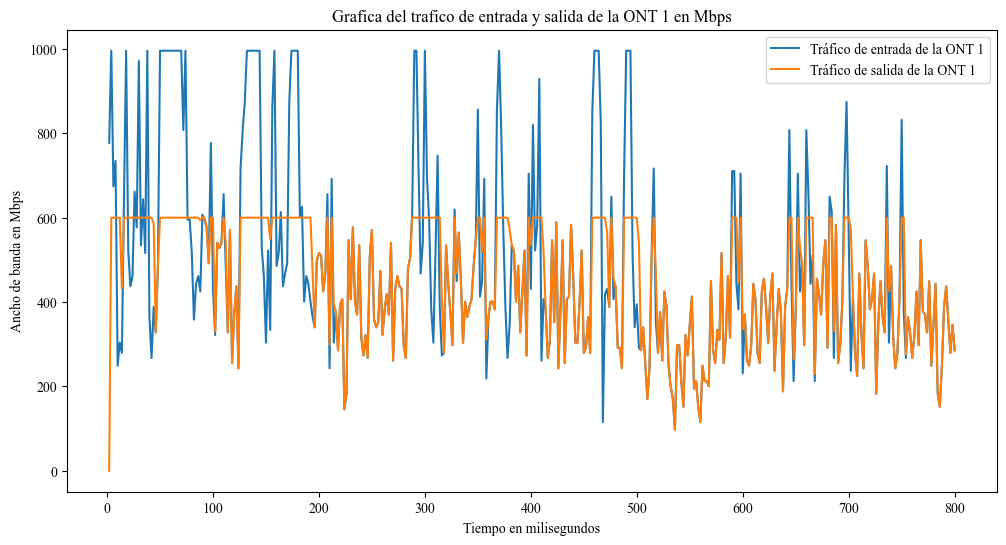

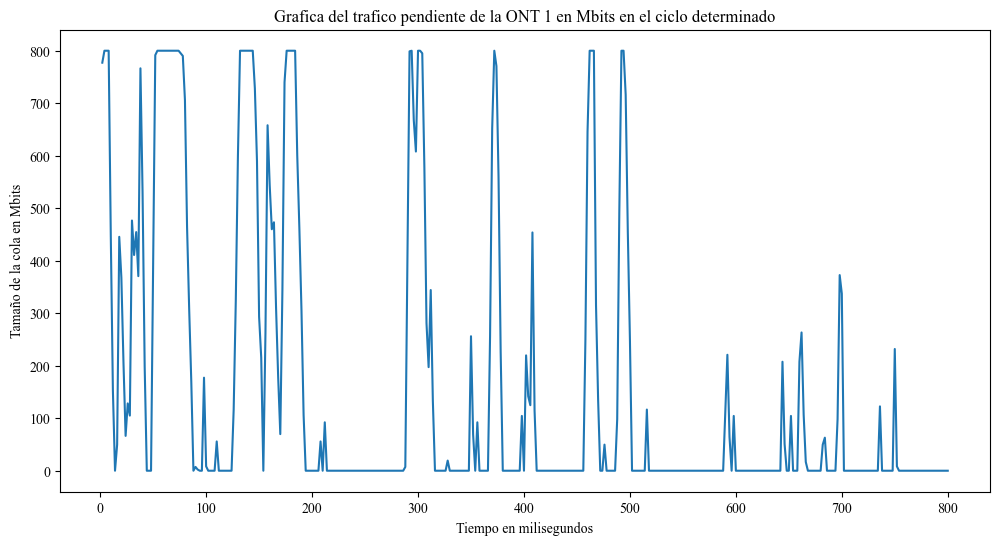

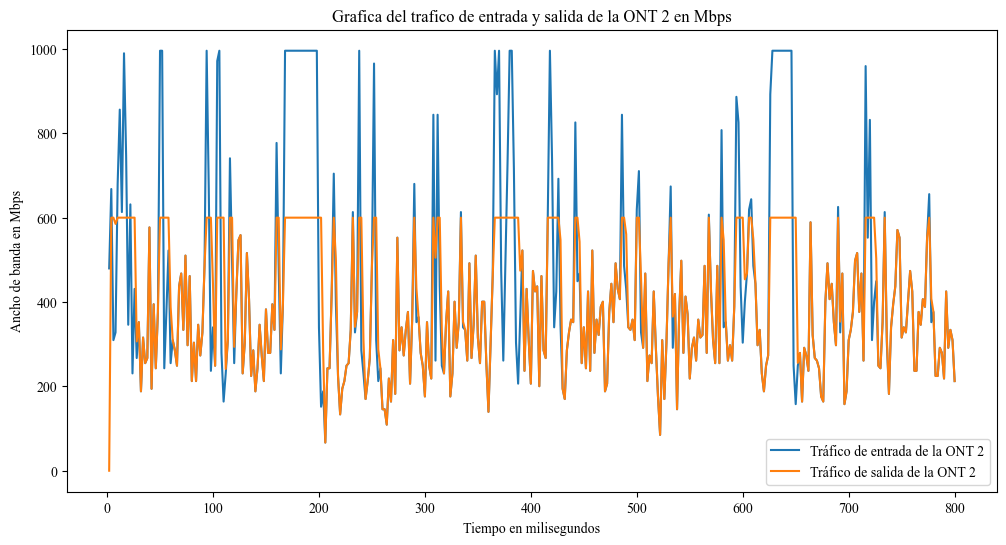

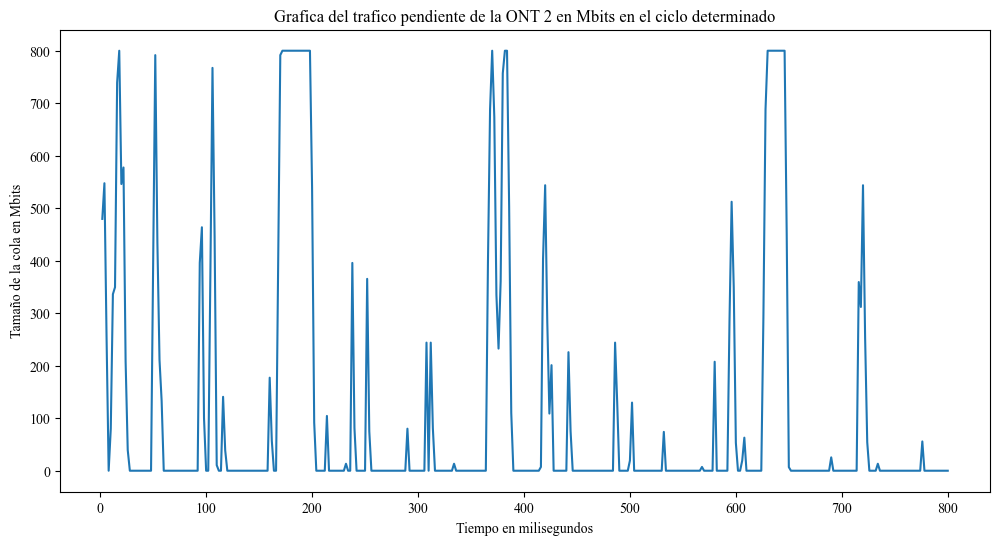

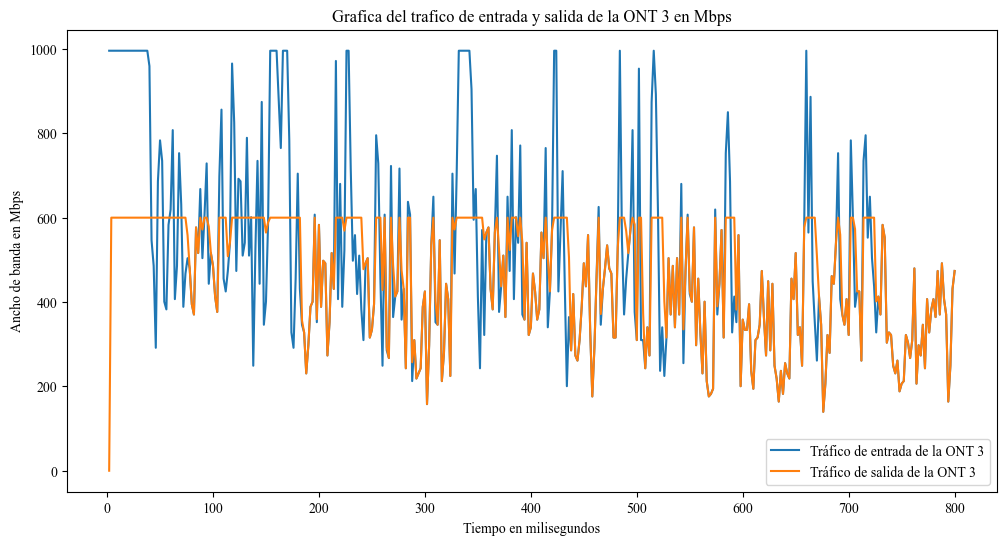

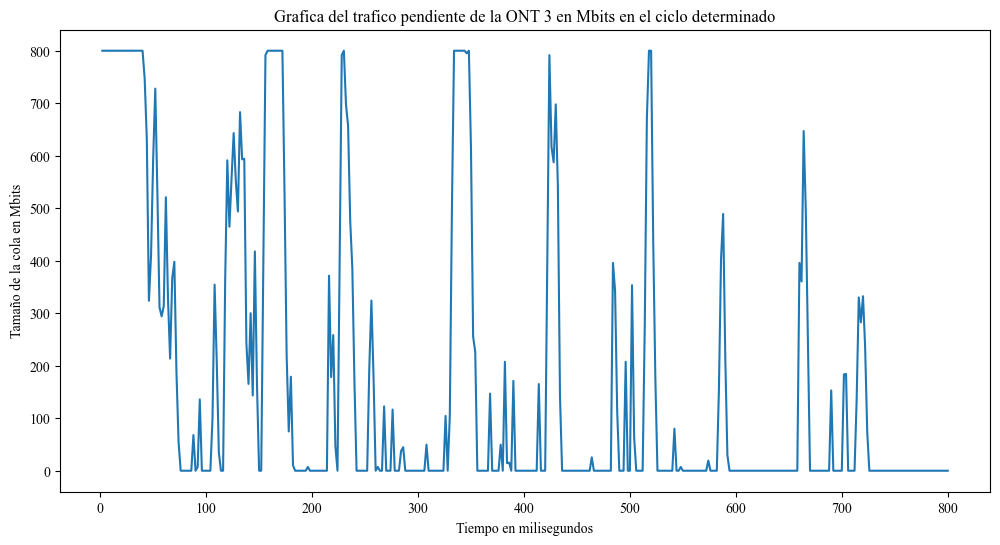

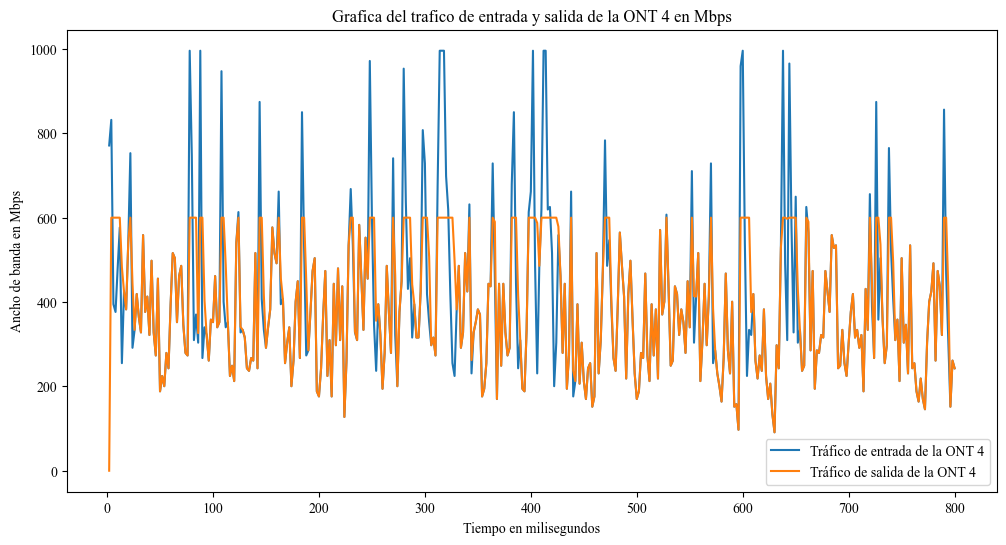

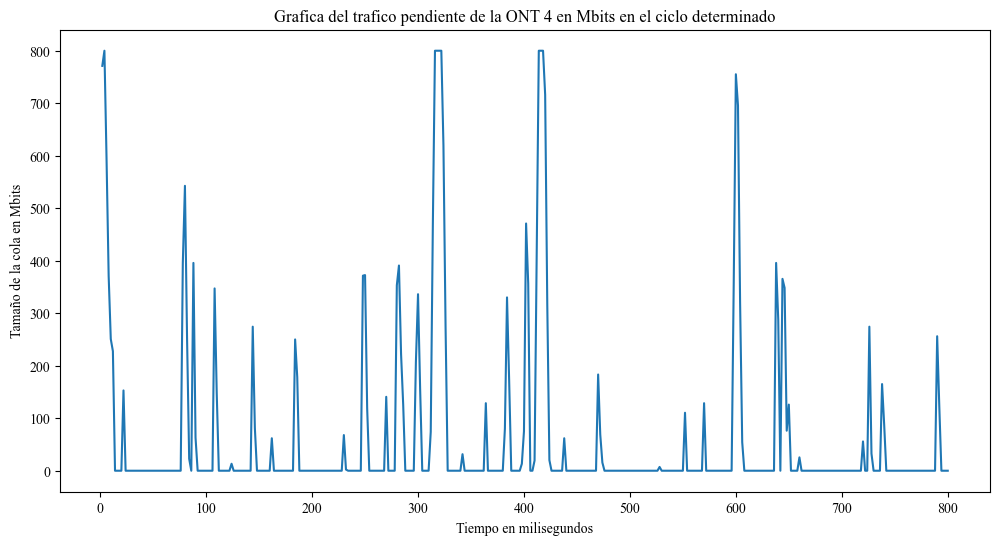

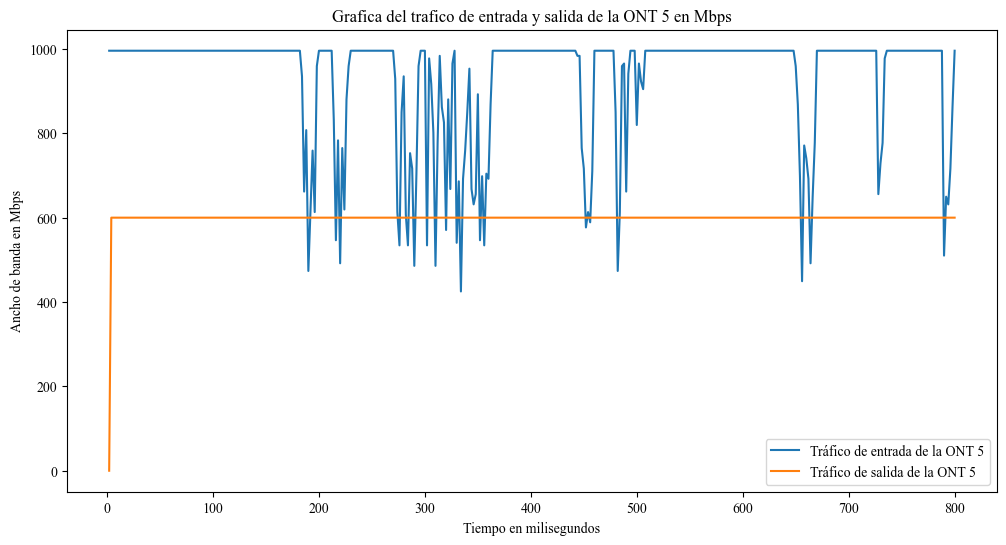

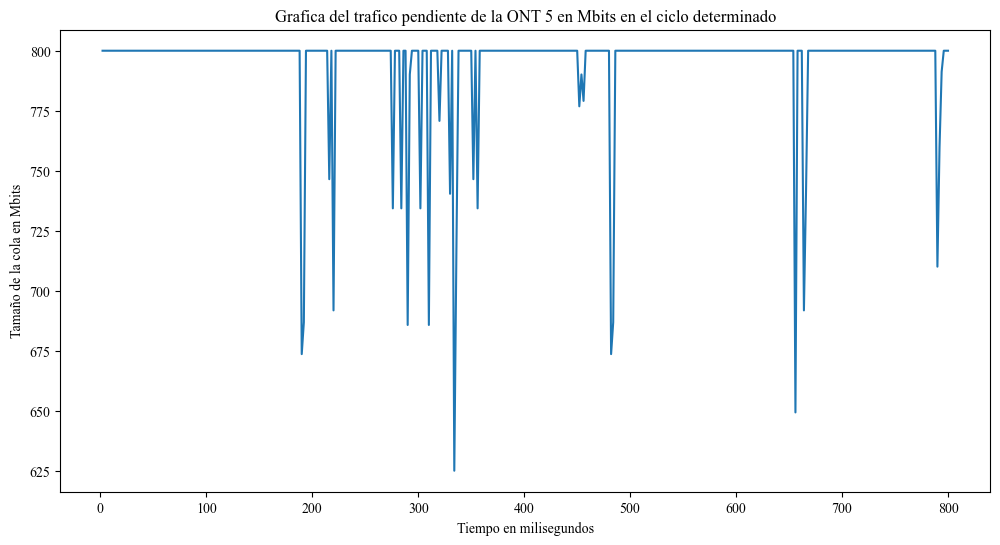

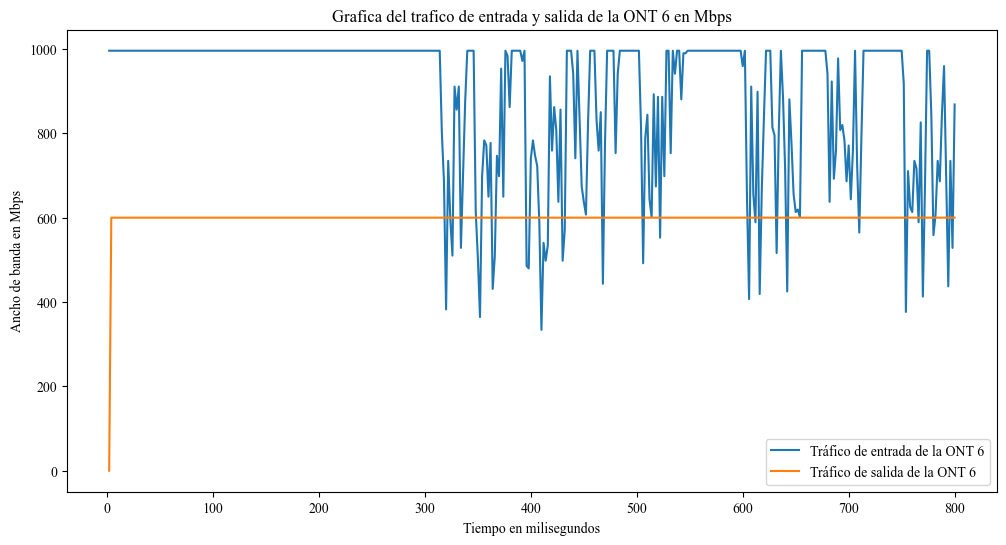

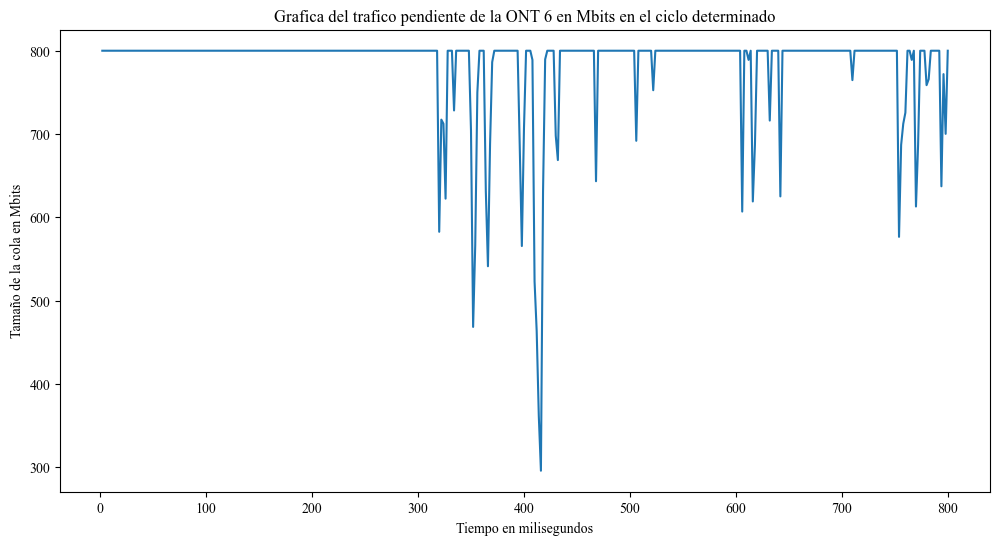

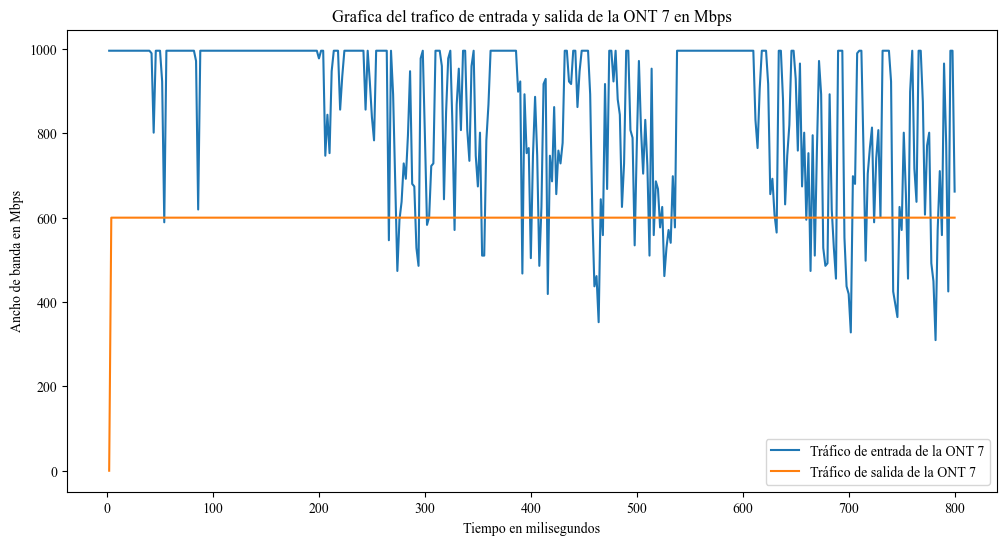

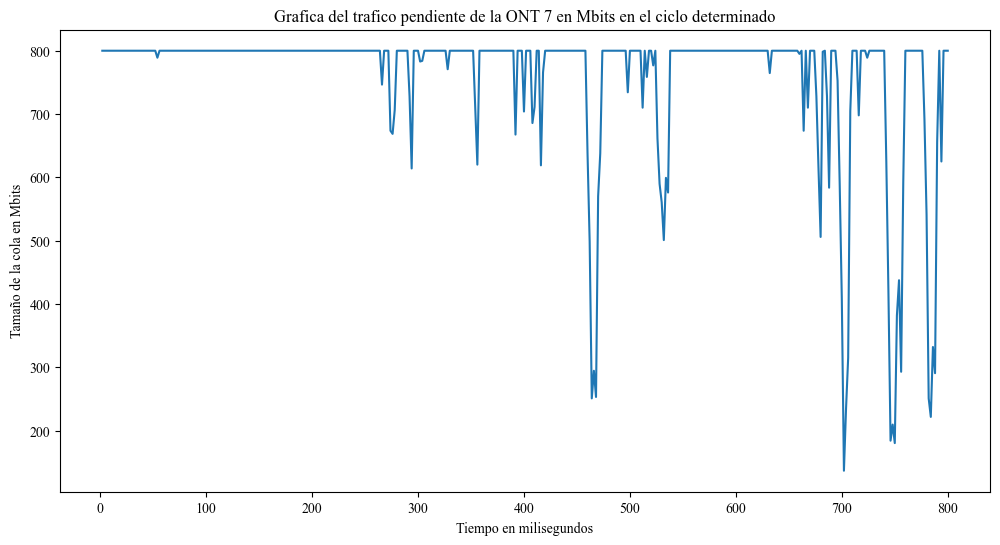

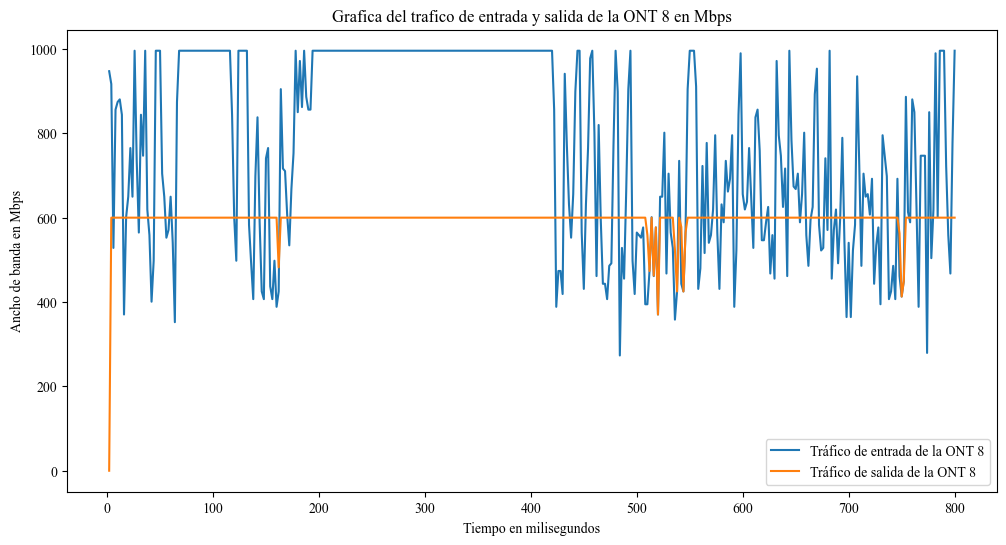

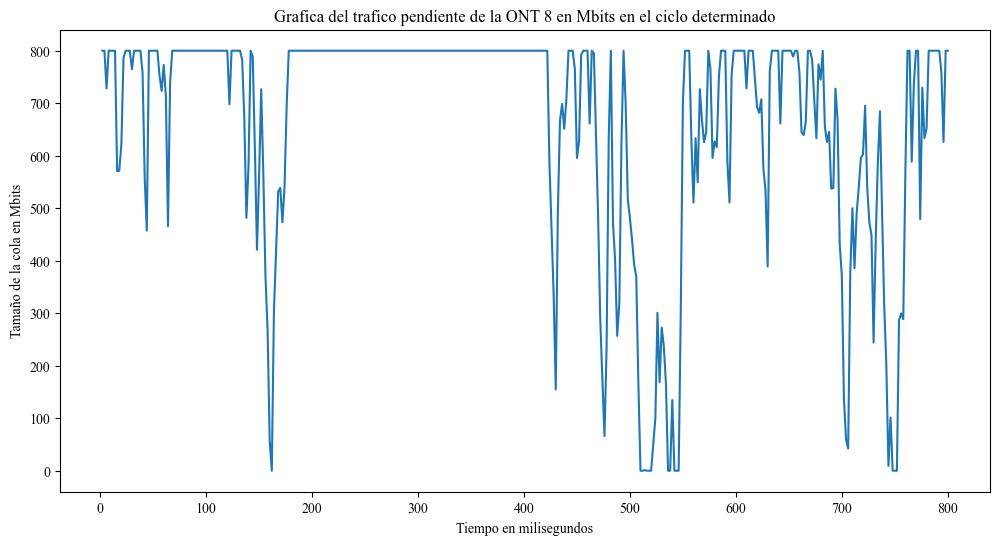

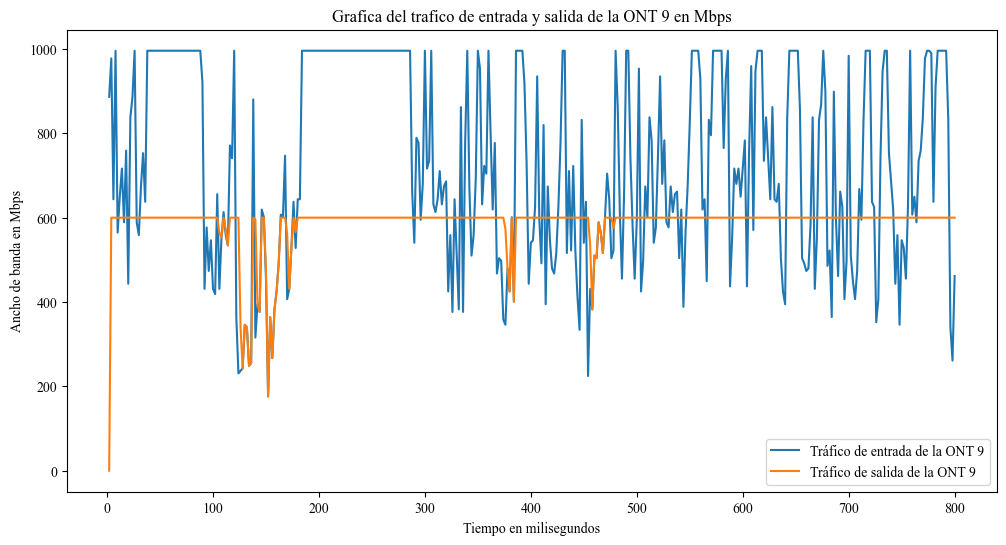

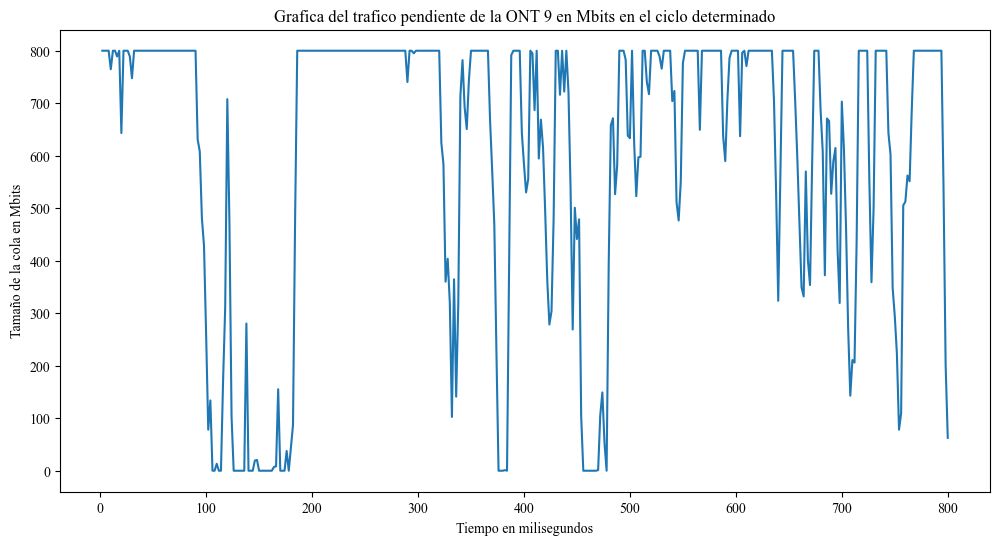

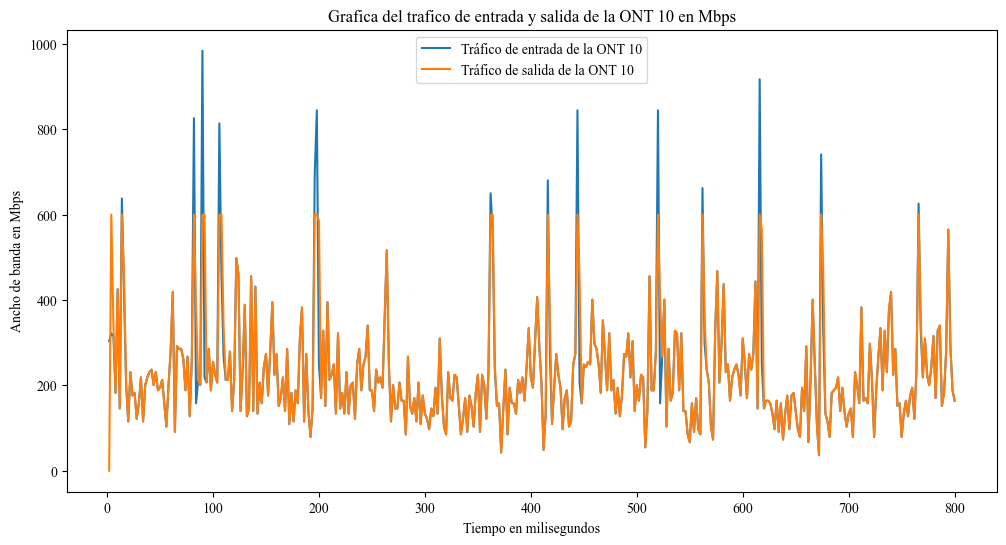

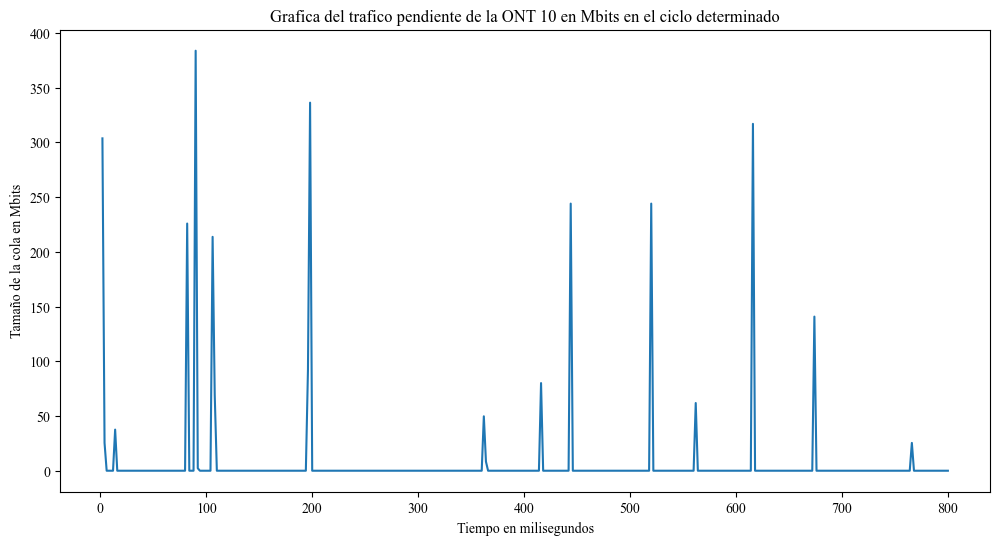

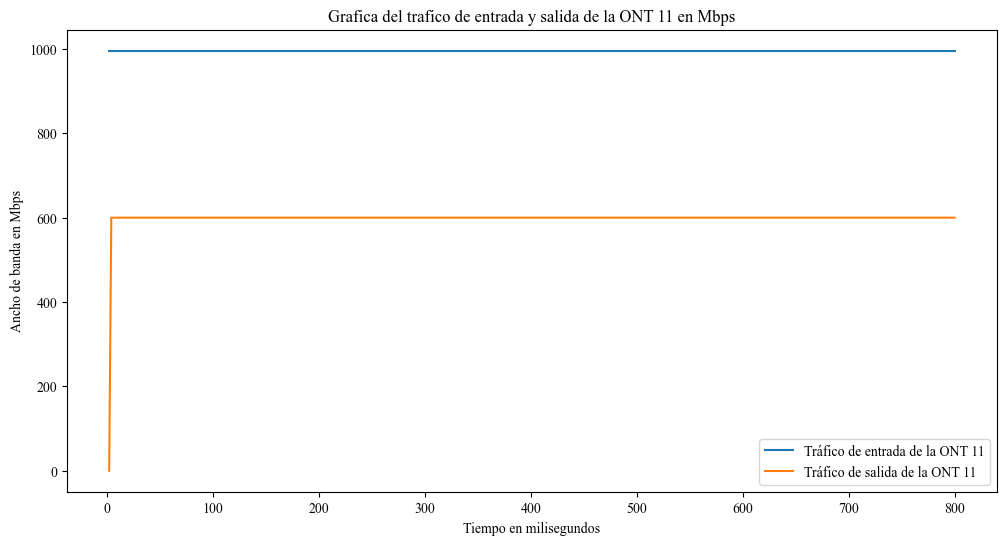

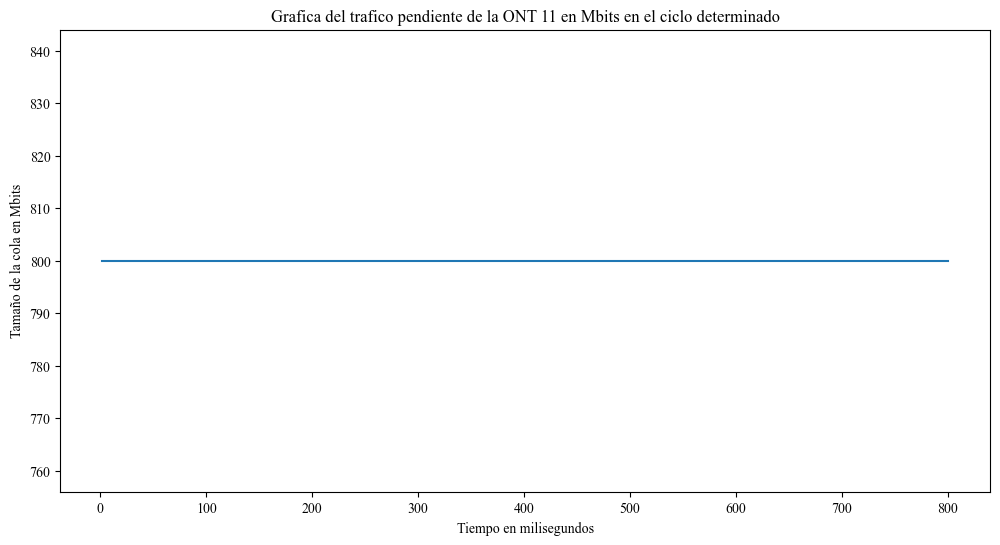

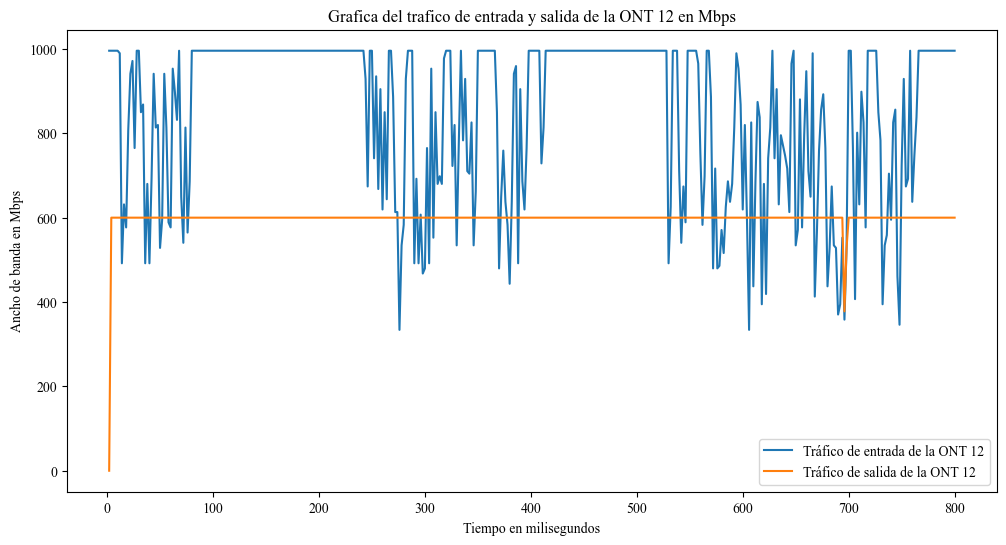

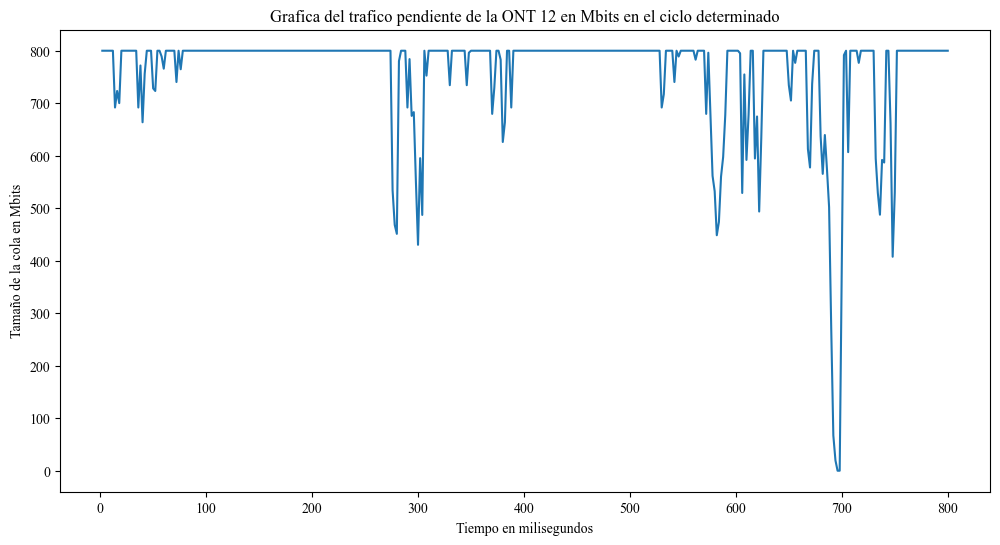

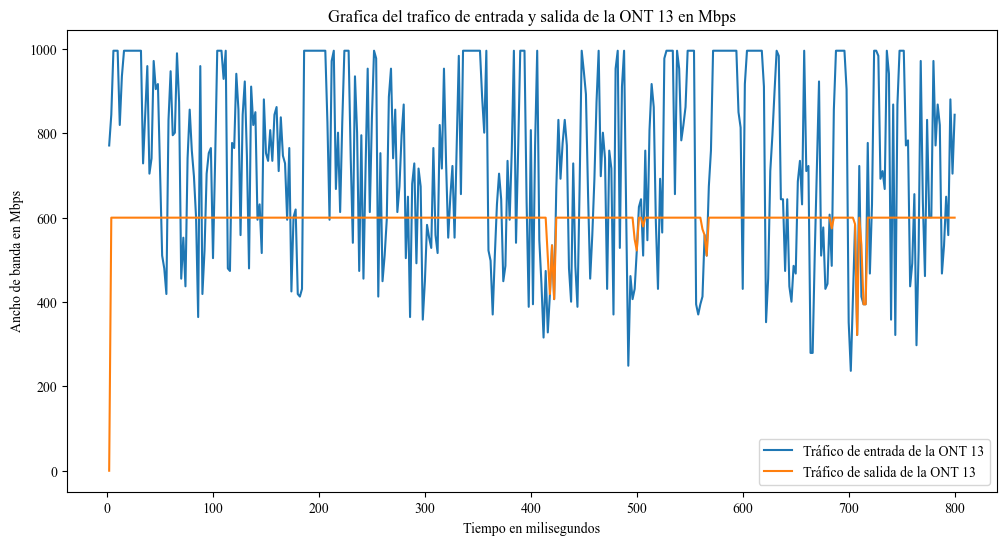

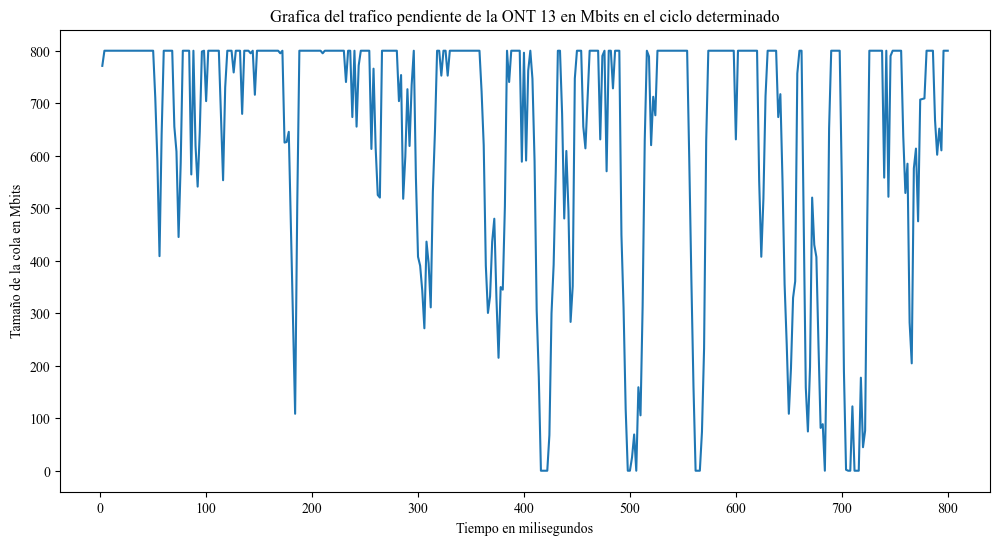

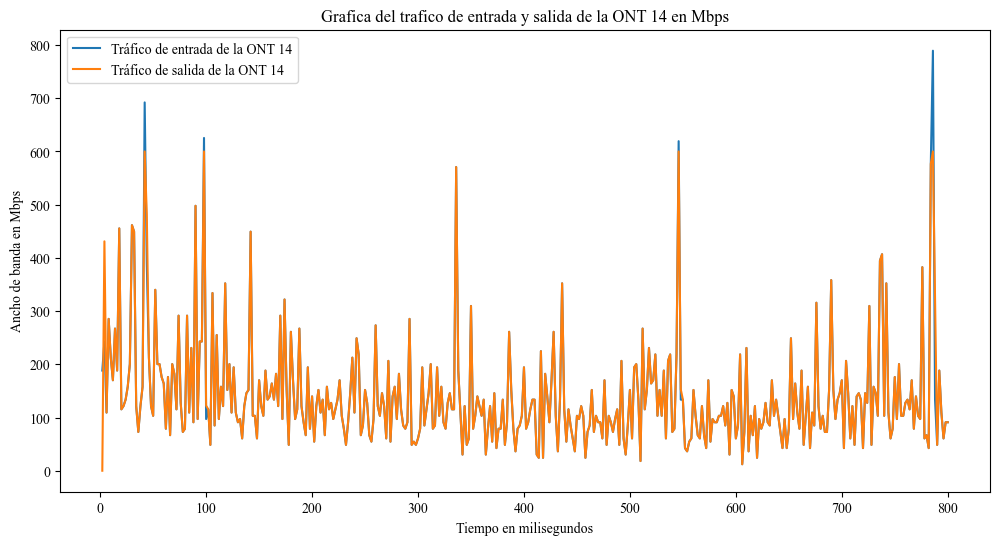

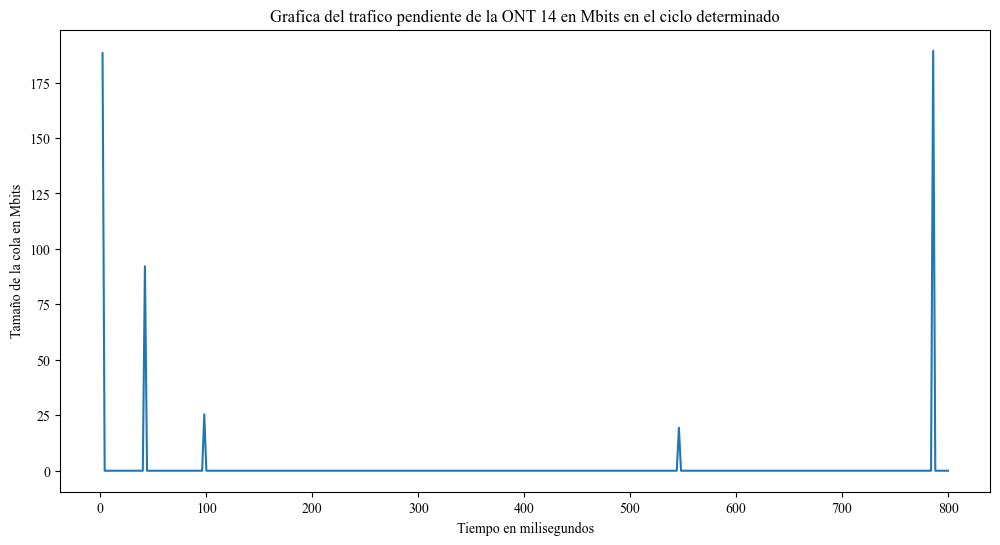

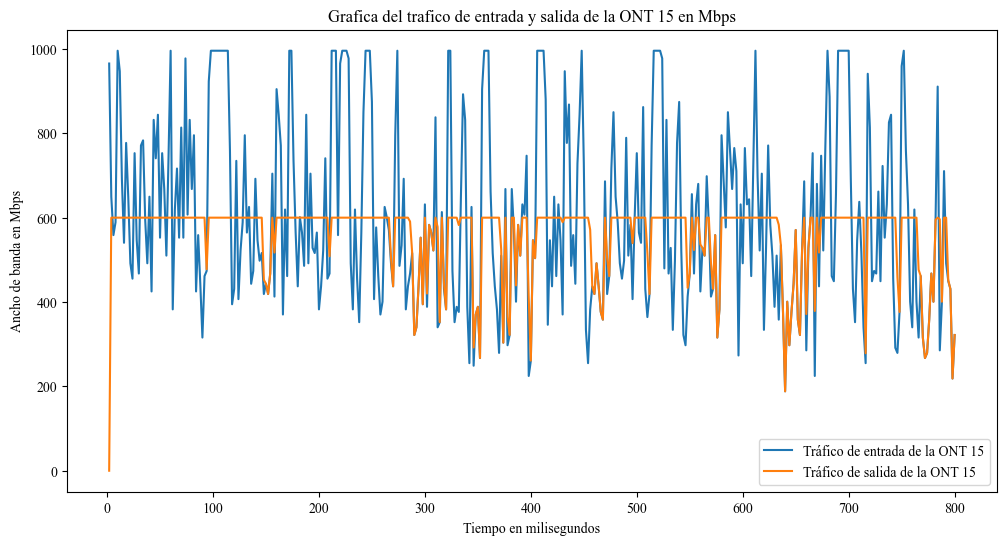

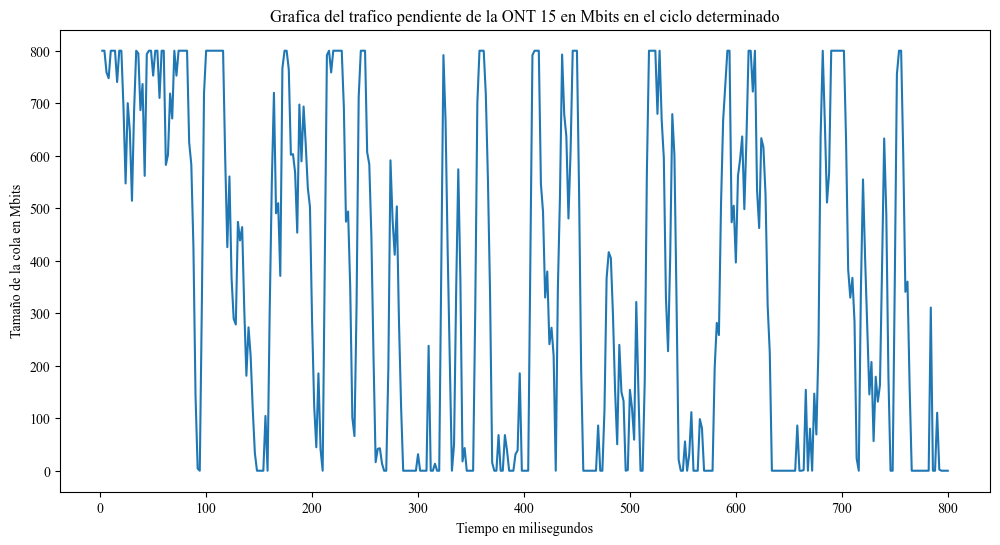

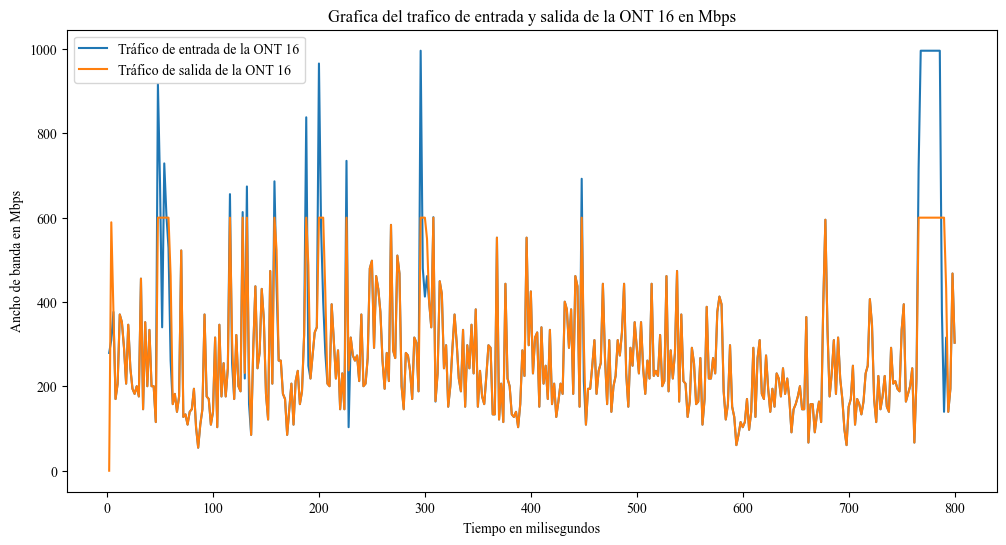

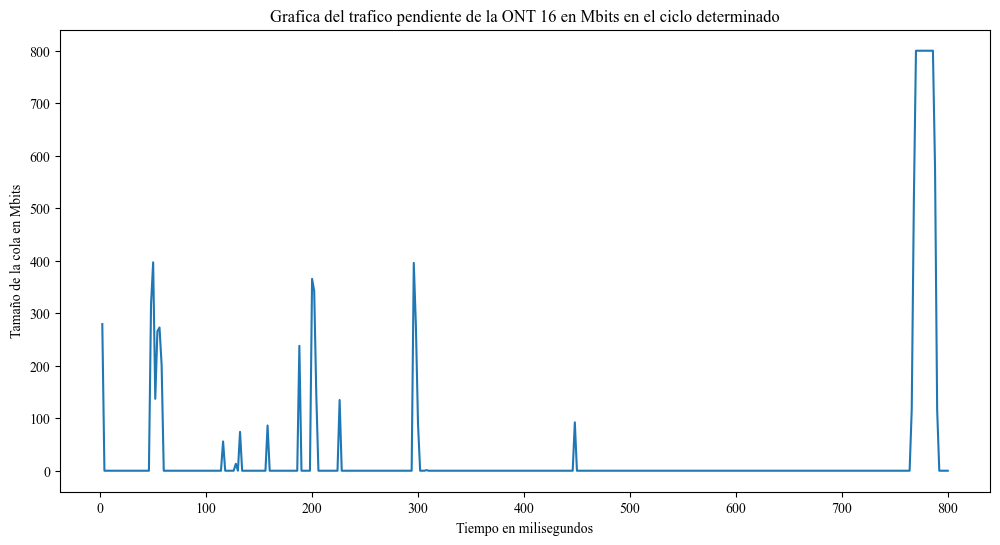

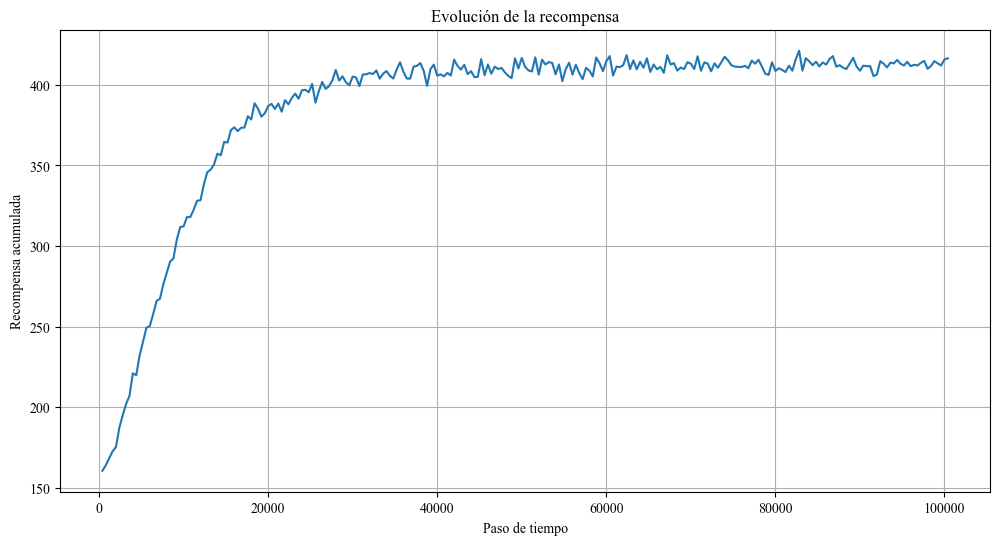

In [7]:
    
    def transpuesta(list_ont):
        #Hay que hacer la matriz transpuesta de la lista

        np_array = np.array(list_ont)
        # Transponer el array
        transposed_np_array = np_array.T

        # Convertir el array transpuesto de NumPy de nuevo a una lista de listas de Python
        list_transpuesta = transposed_np_array.tolist()

        return list_transpuesta
        
    plt.rcParams["font.family"] = "Times New Roman"

    #Hallamos el valor de la lista transpuesta, para los valores de entrada y de salida
    trafico_entrada_onts_transpuesta=transpuesta(trafico_entrada_onts)
    B_alloc_onts_transpuesta=transpuesta(B_alloc_onts)
    trafico_colas_onts_transpuesta=transpuesta(trafico_colas_onts)
    
    # Convertir list_transpuesta a un array NumPy 
    array_trafico_entrada_onts= np.array(trafico_entrada_onts_transpuesta)/2000 
    array_B_alloc_onts= np.array(B_alloc_onts_transpuesta)/2000
    array_pendiente= np.array(trafico_colas_onts_transpuesta)/2000

    # Convertir array_transpuesta de vuelta a una lista de listas si es necesario
    list_valores_entrada = array_trafico_entrada_onts.tolist()
    list_valores_salida = array_B_alloc_onts.tolist()
    list_pendiente_fin = array_pendiente.tolist()

    maximo_pendiente=[]

    #Hallamos el valor maximo de cada ciclo en cada ont para las graficas
    for i in range(num_ont):
        maximo_pendiente.append(max(list_pendiente_fin[i]))

    #Hallar valores de los instantes para el grafico de barras

    #Grafica del trafico de entrada y salida de cada O
    for i in range(num_ont):

        nuevo_x = np.arange(2, 2 * n_ciclos + 1, 2)  # x se duplica para cada punto

        #Grafica del trafico de pareto de las redes
        plt.figure(figsize=(12, 6))
      
        plt.xlabel('Tiempo en milisegundos')
        plt.ylabel('Ancho de banda en Mbps')
        plt.plot(nuevo_x, list_valores_entrada[i], label=f'Tráfico de entrada de la ONT {i+1}')
        plt.plot(nuevo_x, list_valores_salida[i], label=f'Tráfico de salida de la ONT {i+1}')
        plt.title(f'Grafica del trafico de entrada y salida de la ONT {i+1} en Mbps')
        plt.legend()
        plt.show()

        #Grafica del trafico pendiente de la ont determinada
        plt.figure(figsize=(12, 6))
        plt.xlabel('Tiempo en milisegundos')
        plt.ylabel('Tamaño de la cola en Mbits')
        plt.plot(nuevo_x,list_pendiente_fin[i], label=f'Grafica del trafico pendiente de la ONT {i+1}')
        plt.title(f'Grafica del trafico pendiente de la ONT {i+1} en Mbits en el ciclo determinado')
        plt.show()

       

    df = pd.read_csv("./reward_logs/reward.monitor.csv", skiprows=1)

    plt.figure(figsize=(12, 6))
    plt.plot(df["l"].cumsum(), df["r"])  # 'l' = length, 'r' = reward
    plt.xlabel("Paso de tiempo")
    plt.ylabel("Recompensa acumulada")
    plt.title("Evolución de la recompensa")
    plt.grid(True)
    plt.show()

    if entorno_seleccionado == "4":
        
        suma_total_B_alloc = np.sum(array_B_alloc_onts, axis=0)  

        plt.figure(figsize=(16, 8))
        plt.plot(nuevo_x, suma_total_B_alloc, color='tab:purple', label='Suma total B_alloc')
        plt.xlabel('Tiempo en milisegundos')
        plt.ylabel('Ancho de banda total asignado (Mbps)')
        plt.title('Ancho de banda total asignado por ciclo (todas las ONTs)')
        plt.grid(True)
        plt.legend()
        plt.show()   


        plt.figure(figsize=(12, 6))
        plt.plot(nuevo_x, jfi_values[:len(nuevo_x)], label="JFI (ONTs flexibles)", color='green')
        plt.ylim(0, 1.05)
        plt.xlabel("Tiempo en milisegundos")
        plt.ylabel("JFI Index")
        plt.title("Evolución del índice de equidad entre ONTs flexibles")
        plt.grid(True)
        plt.legend()
        plt.show()
